<h1>Boston Airbnb Data Analysis</h1>
In this project, I have tried to analyze Boston city airbnb data listings using CRISP-DM process.
<h2>CRISP-DM Process</h2>

<b>Cross-Industry Standard Process for Data Mining</b> consists of:

1. Business Understanding
2. Data Understanding
3. Data Preparation/ Wrangling
4. Data Modeling
5. Data Evaluation
6. Deployment

Business Understanding: From the datasets we could get a better understanding of rental price for different properties and could figure out interesting features about it. 

<h3><b>Questions of Interest</b></h3>

* On average which is the most costly neighbourhood in Boston?
* What are the most important features to estimate rental price?
* What are the top amenities people needs most?

<b>Data Understanding</b>：Boston dataset consists of 3585 listings. I have analysed the datset before any preprocessing.

<b>Prepared Data</b>: Data cleaning, handled NAN value, one-hot encoding and MinMax preprocessing.

<b>Data Modeling</b>: Used GridSearch with 5 folds validation to find best parameter for LogisticRegression. Some other models are trained and compared as well beforehand. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
import sklearn.metrics

boston_listings = pd.read_csv("boston_listings.csv")

In [2]:
print(boston_listings.shape)
boston_listings.head()

(3585, 95)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [3]:
boston_listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3.585000e+03,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,3571.000000,...,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,8.440875e+06,2.016091e+13,2.492311e+07,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,1.221647,...,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,4.500787e+06,0.000000e+00,2.292781e+07,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,0.501487,...,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,3.353000e+03,2.016091e+13,4.240000e+03,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,0.000000,...,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,2.016091e+13,6.103425e+06,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,1.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,2.016091e+13,1.928100e+07,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,2.016091e+13,3.622147e+07,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,1.493346e+07,2.016091e+13,9.385411e+07,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,6.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


In [4]:
# column names with no missing values
set(boston_listings.columns[boston_listings.isnull().mean()== 0])

{'accommodates',
 'amenities',
 'availability_30',
 'availability_365',
 'availability_60',
 'availability_90',
 'bed_type',
 'calculated_host_listings_count',
 'calendar_last_scraped',
 'calendar_updated',
 'cancellation_policy',
 'country',
 'country_code',
 'description',
 'experiences_offered',
 'extra_people',
 'guests_included',
 'host_has_profile_pic',
 'host_id',
 'host_identity_verified',
 'host_is_superhost',
 'host_listings_count',
 'host_name',
 'host_picture_url',
 'host_since',
 'host_thumbnail_url',
 'host_total_listings_count',
 'host_url',
 'host_verifications',
 'id',
 'instant_bookable',
 'is_location_exact',
 'last_scraped',
 'latitude',
 'listing_url',
 'longitude',
 'maximum_nights',
 'minimum_nights',
 'name',
 'neighbourhood_cleansed',
 'number_of_reviews',
 'picture_url',
 'price',
 'require_guest_phone_verification',
 'require_guest_profile_picture',
 'requires_license',
 'room_type',
 'scrape_id',
 'smart_location',
 'state',
 'street'}

In [5]:
# column names with more than 70% missing values
set(boston_listings.columns[boston_listings.isnull().mean()>0.7])

{'has_availability',
 'jurisdiction_names',
 'license',
 'monthly_price',
 'neighbourhood_group_cleansed',
 'square_feet',
 'weekly_price'}

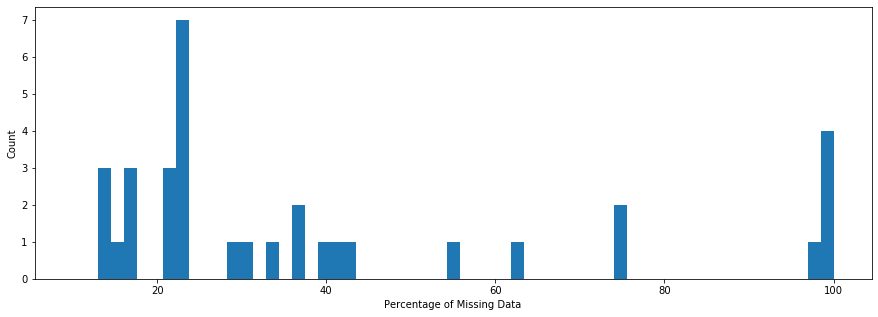

In [6]:
list_null = boston_listings.isnull().sum()
per = list_null / len(boston_listings) * 100

plt.figure(figsize=(15,5))
plt.hist(per, bins = np.linspace(10,100,60))
plt.xlabel('Percentage of Missing Data')
plt.ylabel('Count')
plt.show()

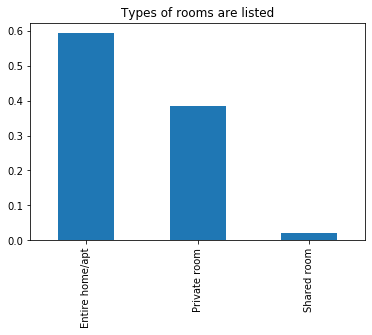

In [7]:
# type and distribution rooms
room_type = boston_listings['room_type'].value_counts()
(room_type/boston_listings.shape[0]).plot(kind="bar");
plt.title("Types of rooms are listed");

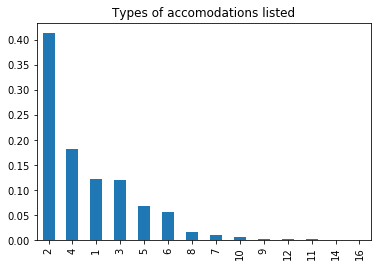

In [8]:
# types of accomodations listed
accom_types = boston_listings['accommodates'].value_counts()
(accom_types/boston_listings.shape[0]).plot(kind="bar");
plt.title("Types of accomodations listed");

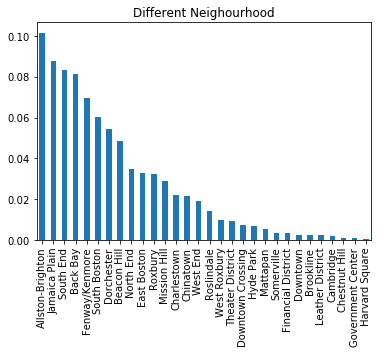

In [9]:
# neighbourhood distribution
diff_neigh = boston_listings['neighbourhood'].value_counts()
(diff_neigh/boston_listings.shape[0]).plot(kind="bar");
plt.title("Different Neighourhood");

count    3585.000000
mean      173.925802
std       148.331321
min        10.000000
25%        85.000000
50%       150.000000
75%       220.000000
max      4000.000000
Name: price, dtype: float64


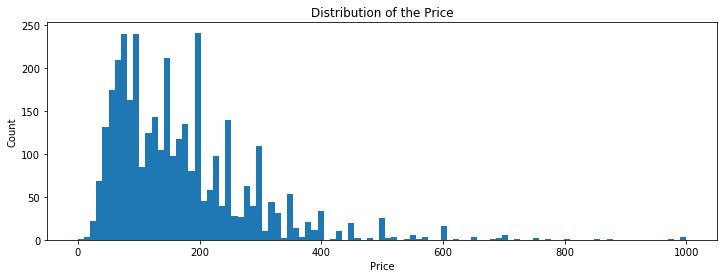

In [10]:
# converting 'price' values to numerber
boston_listings['price'] = boston_listings['price'].apply(lambda x: float(x[1:].replace(',', '')))
print(boston_listings['price'].describe())

# Plotting the distribution of price
plt.figure(figsize=(12,4))
plt.title('Distribution of the Price')
plt.hist(boston_listings.price,bins = np.linspace(0,1000,100))
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

In [11]:
# Dropping columns with ratio of missing data more than 70 percent
drop_index = per[per > 70].index
boston_listings.drop(drop_index, axis = 1, inplace = True)

In [13]:
# group the listings by neighbourood and get the average price
gf = boston_listings.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)

In [15]:
gf

neighbourhood
Harvard Square        359.000000
Financial District    283.692308
Downtown Crossing     273.500000
Leather District      245.875000
Back Bay              245.457045
Chinatown             235.410256
Theater District      234.151515
South Boston          232.120370
Fenway/Kenmore        230.104418
West End              221.602941
Beacon Hill           212.080460
Charlestown           210.050633
South End             206.721477
Government Center     205.333333
Cambridge             203.000000
Downtown              196.500000
North End             195.512000
Roxbury               147.637931
Jamaica Plain         140.687898
Brookline             130.375000
Mission Hill          127.805825
East Boston           124.059829
Allston-Brighton      114.162088
West Roxbury          111.342857
Roslindale             99.160000
Dorchester             97.451282
Hyde Park              93.680000
Somerville             93.076923
Mattapan               72.000000
Chestnut Hill          70.750

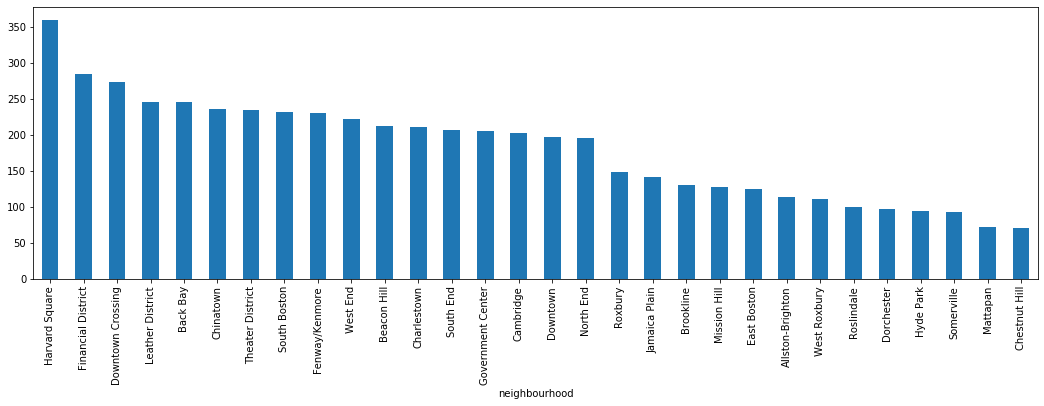

In [14]:
gf.plot.bar(figsize=(18,5)) 
plt.show() 

In [13]:
boston_listings[['reviews_per_month','number_of_reviews','calculated_host_listings_count','price','minimum_nights','availability_365']].describe()

,reviews_per_month,number_of_reviews,calculated_host_listings_count,price,minimum_nights,availability_365
count,2829.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000
mean,1.970908,19.044630,12.733891,173.925802,3.171269,179.346444
std,2.120561,35.571658,29.415076,148.331321,8.874133,142.136180
min,0.010000,0.000000,1.000000,10.000000,1.000000,0.000000
25%,0.480000,1.000000,1.000000,85.000000,1.000000,19.000000
50%,1.170000,5.000000,2.000000,150.000000,2.000000,179.000000
75%,2.720000,21.000000,6.000000,220.000000,3.000000,325.000000
max,19.150000,404.000000,136.000000,4000.000000,300.000000,365.000000


1. Price is long tailed and is right skewed with a mean price of 173.92 and a max of 4000.
2. Minimum nights has an average of 3.17 and a maximum value of 300, which is an error

<b>Answer 1</b> : Harvard Square turned out to be the most costly neighbourhood.

In [14]:
# Drop large price rows and some other useless columns
price_drop_index = boston_listings[boston_listings['price'] > 500].index
boston_listings.drop(price_drop_index, axis = 0, inplace = True)
boston_listings.drop(['space', 'neighborhood_overview', 'transit', 'access', 'interaction', 'house_rules','listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'description', 
           'experiences_offered', 'picture_url', 'host_url', 'host_name', 'host_thumbnail_url', 'host_about', 'host_neighbourhood',
          'host_picture_url', 'host_location', 'street', 'city', 'state', 'smart_location', 'country_code', 'country', 'first_review', 'last_review', 'id', 'host_verifications', 
           'host_id', 'neighbourhood', 'calendar_last_scraped', 'market'], axis = 1, inplace = True)

In [15]:
# converting 'amenities' column into catagorical column
df = boston_listings
df['amenities'] = df['amenities'].map(lambda d: [amenity.replace('"', "").replace("{", "").replace("}", "") for amenity in d.split(",")])
possible_amenities = list(set([item for sublist in df['amenities'] for item in sublist]))
del possible_amenities[1]
print("Amenities in total {}".format(len(possible_amenities)))
mlb = MultiLabelBinarizer()
amenities_result = pd.DataFrame(mlb.fit_transform(df['amenities']),columns=mlb.classes_, index=df.index)
df2 = pd.concat([df, amenities_result], axis=1, sort = False)
df2.drop(['amenities'], axis = 1, inplace = True)

Amenities in total 45


In [16]:
# Preprocessing other columns, converting them into numerical value
df2['cleaning_fee'] = df2['cleaning_fee'].replace( '[$,]','', regex=True ).astype(float)
df2['extra_people'] = df2['extra_people'].replace( '[$,]','', regex=True ).astype(float)
df2['host_response_rate'] = df2['host_response_rate'].replace( '%','', regex=True ).astype(float)
if type(df2.zipcode[0]) == str:
    df2.zipcode = df2.zipcode.str[:5].apply(lambda x: float(x))

In [17]:
#Processing missing data
df2.bathrooms.fillna(df2.groupby("bedrooms")["bathrooms"].transform("median"), inplace=True)
df2.beds.fillna(df2.groupby("bedrooms")["beds"].transform("median"), inplace=True)
df2.bedrooms.fillna(df2.groupby("bathrooms")["bedrooms"].transform("median"), inplace=True)
df2.cleaning_fee.fillna(0, inplace = True)
fillmean_list = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 
                 'review_scores_location', 'review_scores_value', 'reviews_per_month']

for col in fillmean_list:
    df2[col].fillna(df[col].mean(), inplace = True)
df2['host_response_rate'].fillna(df2.host_response_rate.mean(), inplace = True)   
df2.zipcode.fillna(boston_listings.groupby('neighbourhood_cleansed')['zipcode'].apply(lambda x: x.fillna(x.value_counts().index[0])), inplace = True)

# One-hot encoding the whole dataframe
df2 = pd.get_dummies(df2)
price_raw = df2['price']
df2 = df2.drop('price', axis = 1)


In [18]:
# Split the preprocessed dataset into train/test dataset
X_train, X_test, y_train, y_test = train_test_split(df2, price_raw, test_size = 0.2, random_state = 11)
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 2815 samples.
Testing set has 704 samples.


In [21]:
# Grid Search to find Best Parameter
param_grid = {'n_estimators': [100], 
              'learning_rate': [0.05],
              'max_depth': [10],
              'min_samples_split': [5],
              'subsample': [0.7]
             }

forest_reg = GradientBoostingRegressor(random_state = 42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring = 'neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)
y_pred = grid_search.predict(X_test)
print("Error Score on Test Data: {}.".format(np.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred))))

{'learning_rate': 0.05, 'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100, 'subsample': 0.7}
51.169427085427564 {'learning_rate': 0.05, 'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100, 'subsample': 0.7}
Error Score on Test Data: 48.05689360259468.


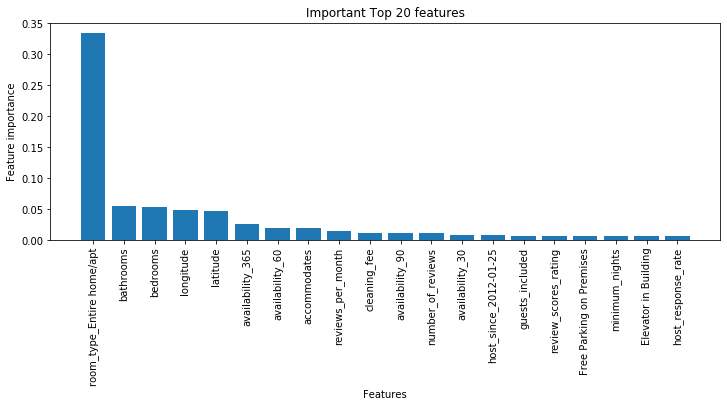

In [22]:
# Plot Feature Importance
feature_importances = grid_search.best_estimator_.feature_importances_
features = sorted(zip(feature_importances, df2.columns), reverse=True)
attribute = []
coefficient = []
for feature in features:
    attribute.append(feature[1]) 
    coefficient.append(feature[0])
plt.figure(figsize=(12,4))
plt.bar(attribute[:20], height=coefficient[:20])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Feature importance')
plt.title('Important Top 20 features')
plt.show()

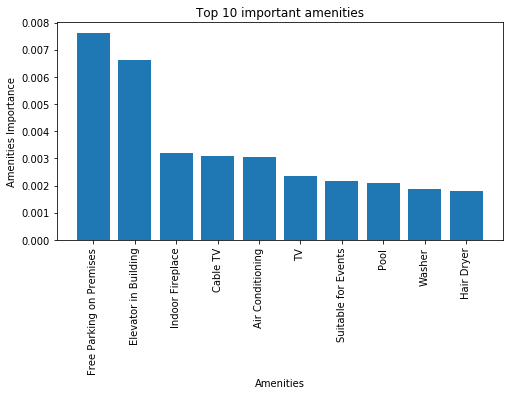

In [23]:
# Plotting Amenities Importance
amenity= []
amn_coef = []
for feature in features:
    if feature[1] in possible_amenities:
        amenity.append(feature[1])
        amn_coef.append(feature[0])
plt.figure(figsize=(8,4))
plt.bar(amenity[:10], height=amn_coef[:10])
plt.xticks(rotation = 90)
plt.xlabel('Amenities')
plt.ylabel('Amenities Importance')
plt.title('Top 10 important amenities')
plt.show()